c:\Users\Gamer\Desktop\postgrad-ai\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8079 - loss: 0.6450
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9273 - loss: 0.2418
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9402 - loss: 0.2017
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9470 - loss: 0.1706
Epoch 5/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9515 - loss: 0.1592
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9561 - loss: 0.1418
Epoch 7/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9576 - loss: 0.1339
Epoch 8/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9607 - loss: 0.1272
Epoch 9/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9625 - loss: 0.1211
Epoch 10/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9638 - loss: 0.1147
Epoch 11/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9657 - loss: 0.1094
Epoch 12/200
1875/1

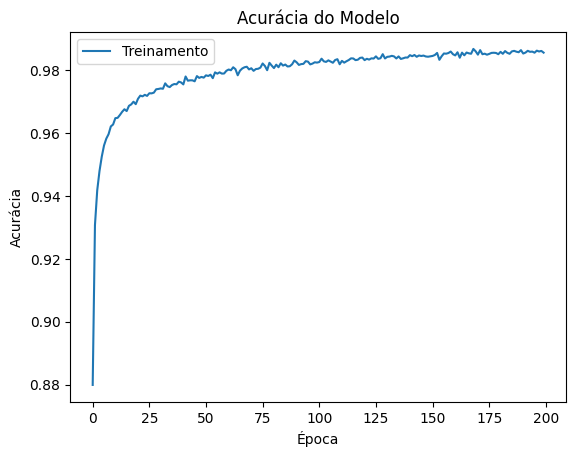

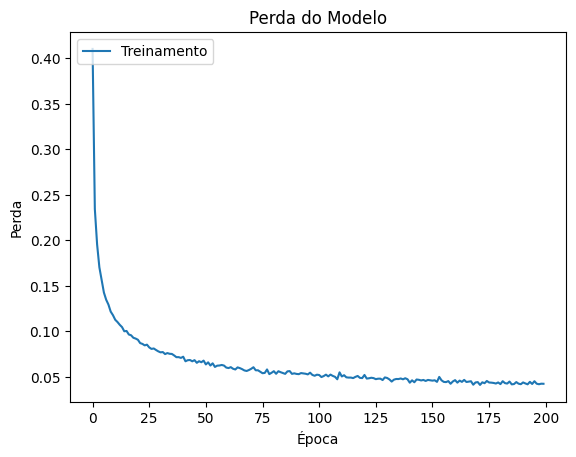

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Dataset mnist-60 mil figuras 28x28 pixels
mnist= tf.keras.datasets.mnist
# Carregar os dados de treino eteste
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalização dos dados (figuras)-(0-255)-> (0-1)
x_train,x_test = x_train / 255.0,x_test / 255.0
# Criar uma rede neural
model= tf.keras.models.Sequential([
    # Entrada tem que ser transformada de figuras 28x28 em um vetor
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Camada oculta com N neurônios utilizando a função de ativação ReLU
    tf.keras.layers.Dense(32,
    activation=tf.nn.relu),
    # Camada oculta em X% dos neurônios desativados aleatoriamente
    tf.keras.layers.Dropout(0.1),
    # Camada de saída-como são números 0 a 9 serão 10 saídas
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
# Definir algoritmo de treinamento, função de perda e a métrica de treinamento
model.compile(optimizer='adam',
loss='SparseCategoricalCrossentropy',
metrics=['accuracy'])
#Treinar a rede
history= model.fit(x_train, y_train, epochs=200)
#Avaliar a acurácia de rede noconjunto de teste
model.evaluate(x_test, y_test, verbose=2)
#Plot das figuras com acuráciae perda
plt.plot(history.history['accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento'], loc='upper left')
plt.show()